# 第10回の宿題(ステップワイズ法の理解)の回答例

- アヤメデータセットはsepal_lengthなど、品種を除いて4つの変数を持っています。この4変数に対して、フォワードのステップワイズ法を使用して、BICが最小となるような変数の組を求めて下さい。

In [1]:
import seaborn as sns # seabornのサンプルデータを使用する
df = sns.load_dataset("iris") # アヤメのがくや花びらの長さ&幅、品種のデータ

In [3]:
data = df.iloc[:, :4] # 品種以外のデータを取り出す

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [15]:
n_components = 4

In [16]:
feature_list = list(data.columns) # 候補の変数のリスト
selected_feature = [] # 選ばれた変数のリスト。最初は空のリスト。
best_bic = np.inf # 最初は無限大にしておく。

# feature_listが空でない限り、ループを回す。breakでwhileループを抜けることもある。
while len(feature_list) > 0:
    best_feature = ""
    for feature in feature_list:
        tmp_feature_list = selected_feature + [feature] # 試しに変数を追加
        df_tmp = data[tmp_feature_list] # 変数の部分だけデータを取り出す
        gmm = GaussianMixture(n_components=n_components)
        gmm.fit(df_tmp)
        bic = gmm.bic(df_tmp)
        if bic < best_bic:
            best_feature = feature # もしbicが今までの最良のbicよりも更に良ければ、その変数を記録
            best_bic = bic
    if best_feature != "": # 何か追加すべき(bicが改善する)変数があれば、その変数を追加する。
        selected_feature.append(best_feature)
        feature_list.remove(best_feature) # 候補の変数リストから、今回追加した変数を除外しておく
        print(f"feature {best_feature} is added. BIC is {best_bic:.1f}.")
    else: # どの変数を追加してもbicが悪化するようであれば、best_featureは空のままのはずで、その際はループを抜ける
        break

feature sepal_width is added. BIC is 224.6.
feature petal_width is added. BIC is 141.5.


In [17]:
selected_feature

['sepal_width', 'petal_width']

Text(0, 0.5, 'petal_width')

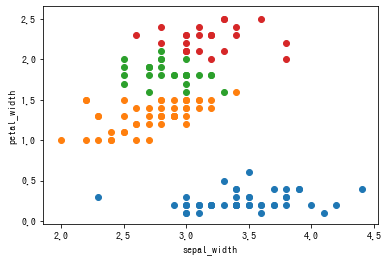

In [28]:
import matplotlib.pyplot as plt

gmm = GaussianMixture(n_components=n_components)
gmm.fit(data[selected_feature])
df_pred = df.copy()
df_pred["group"] = gmm.predict(data[selected_feature])
for group in df_pred["group"].unique():
    df_tmp = df_pred.loc[df_pred["group"] == group, selected_feature]
    plt.scatter(df_tmp["sepal_width"], df_tmp["petal_width"], label=group)

plt.xlabel("sepal_width"); plt.ylabel("petal_width")